In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tabulate import tabulate

# Q1

In [3]:
def load_data(file_name):
    current_directory = os.getcwd()
    parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
    file_path = os.path.join(parent_directory, file_name)
    dataset = pd.read_csv(file_path)
    return dataset

In [4]:
dataset = load_data('climate_change.csv')

# Q2

In [5]:
dataset.head(10)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
5,1983,10,0.002,340.30,1663.79,303.970,195.171,359.174,1366.0589,0.0569,0.093
6,1983,11,-0.176,341.53,1658.23,304.032,195.921,360.758,1366.1072,0.0524,0.232
7,1983,12,-0.176,343.07,1654.31,304.082,196.609,362.174,1366.0607,0.0486,0.078
8,1984,1,-0.339,344.05,1658.98,304.130,197.219,363.359,1365.4261,0.0451,0.089
9,1984,2,-0.565,344.77,1656.48,304.194,197.759,364.296,1365.6618,0.0416,0.013


# Q3

In [61]:
num_samples =dataset.shape[0]

308

There are 308 samples!

# Q4

In [60]:
description = dataset.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


The average parameter values are as follows:
1. Temperature: 0.256776
2. Carbon Dioxide: 363.226753
3. Nitrogen Dioxide: 312.391834
4. Methane: 1749.824513

# Q5

In [10]:
temp_std = description['Temp']['std']

STD for Temp is 0.17908976824102688.

# Q6

In [12]:
def correlation(datatset, target_col,num_most):
    correlation_data = []
    for col_name in dataset.columns:
        if col_name == target_col:
            continue
        correlation = dataset[target_col].corr(dataset[col_name])
        if correlation < 0:
            correlation_type = "negatively correlated"
        elif correlation > 0:
            correlation_type = "positively correlated"
        else:
            correlation_type = "not correlated"
            
        correlation_data.append([col_name, correlation, correlation_type])
        
    print(tabulate(correlation_data, headers=["Variable", "Correlation", "Correlation Type"], tablefmt="grid"))
    correlation_data = sorted(correlation_data, key=lambda x: abs(x[1]),reverse=True)
    print('--------------------------------')
    
    
    for index, most_corr in enumerate(correlation_data[:num_most]):
        print(f"{most_corr[0]} has the {index+1} highest correlation with {target_col}.")
        print(f"correlation value is: {most_corr[1]}")
        print("--")
        
    return correlation_data


In [13]:
num_most = 1
correlation_data = correlation(dataset,"Temp",num_most)

+------------+---------------+-----------------------+
| Variable   |   Correlation | Correlation Type      |
+============+===============+=======================+
| Year       |     0.755731  | positively correlated |
+------------+---------------+-----------------------+
| Month      |    -0.0980158 | negatively correlated |
+------------+---------------+-----------------------+
| MEI        |     0.135292  | positively correlated |
+------------+---------------+-----------------------+
| CO2        |     0.748505  | positively correlated |
+------------+---------------+-----------------------+
| CH4        |     0.699697  | positively correlated |
+------------+---------------+-----------------------+
| N2O        |     0.743242  | positively correlated |
+------------+---------------+-----------------------+
| CFC-11     |     0.380111  | positively correlated |
+------------+---------------+-----------------------+
| CFC-12     |     0.688944  | positively correlated |
+---------

In [14]:
variables = [item[0] for item in correlation_data]
correlations = [item[1] for item in correlation_data]

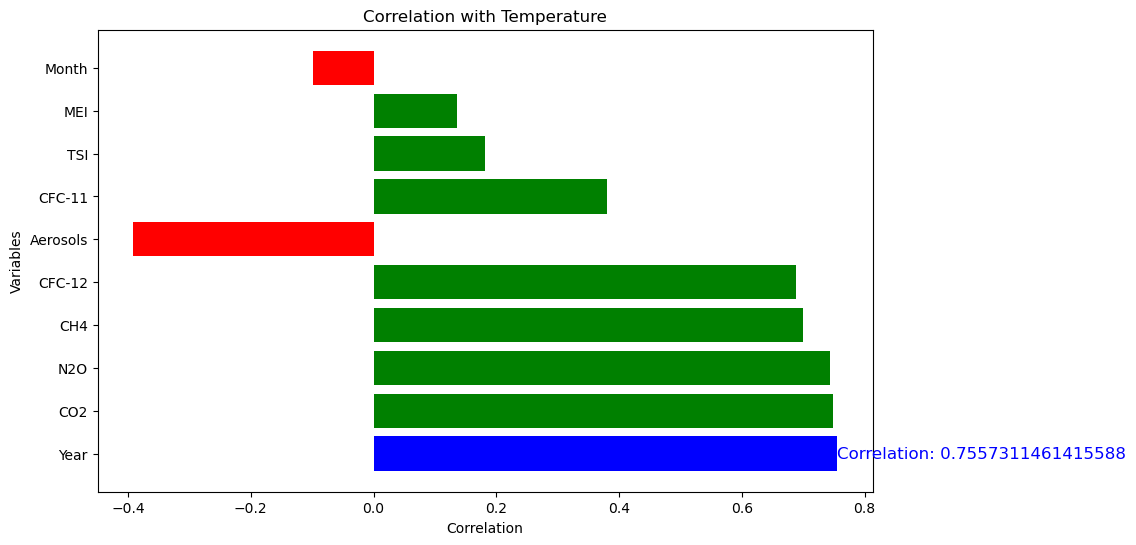

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(variables, correlations, color=['green' if corr > 0 else 'red' for corr in correlations])
 
for item in correlation_data[:num_most]:
    plt.barh(item[0], item[1], color='blue')
    plt.text(item[1], item[0], f"Correlation: {item[1]}", va='center', fontsize=12, color='blue')

plt.xlabel("Correlation")
plt.ylabel("Variables")
plt.title("Correlation with Temperature")
plt.show()


# Q7

***Temperature and CO2 have a positive correlation, which means that by increasing CO2, temperature will also increase.***

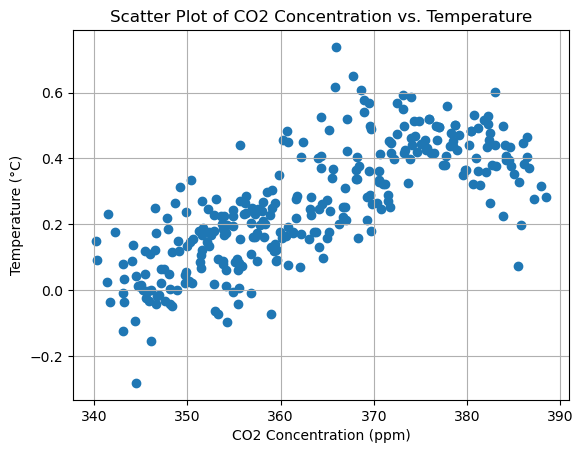

In [16]:
plt.scatter(dataset['CO2'], dataset['Temp'])
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Temperature (°C)')
plt.title('Scatter Plot of CO2 Concentration vs. Temperature')
plt.grid(True)
plt.show()

# Part 2-2

# Q1

In [58]:
train_data =dataset[dataset.Year<= 2003]

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
243,2003,8,0.241,374.32,1773.56,317.703,255.889,542.529,1366.2744,0.0028,0.514
244,2003,9,0.441,373.20,1788.75,317.796,255.641,542.719,1366.3611,0.0029,0.499
245,2003,10,0.509,373.10,1806.62,317.950,255.573,542.935,1365.5612,0.0028,0.550
246,2003,11,0.519,374.64,1808.15,318.080,255.679,543.166,1366.1956,0.0028,0.419


In [57]:
test_data = dataset[dataset.Year > 2003]

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
248,2004,1,0.308,377.00,1790.34,318.193,255.276,543.133,1366.1038,0.0025,0.496
249,2004,2,0.330,377.87,1798.45,318.188,255.018,543.039,1366.0890,0.0024,0.560
250,2004,3,-0.125,378.73,1807.48,318.198,254.712,543.008,1366.1272,0.0024,0.501
251,2004,4,0.216,380.41,1806.05,318.130,254.385,542.685,1366.1742,0.0024,0.484
252,2004,5,0.470,380.63,1788.24,318.101,254.176,542.361,1366.0297,0.0022,0.323
253,2004,6,0.170,379.56,1780.35,318.074,253.870,542.098,1366.0179,0.0022,0.350
254,2004,7,0.472,377.61,1775.16,318.131,253.590,541.999,1365.7578,0.0023,0.380
255,2004,8,0.669,376.15,1770.29,318.236,253.440,541.864,1365.9036,0.0025,0.418
256,2004,9,0.524,374.11,1778.70,318.314,253.211,541.798,1366.0957,0.0025,0.442
257,2004,10,0.467,374.44,1791.29,318.476,252.899,542.317,1366.1166,0.0025,0.468


# Q2 

In [21]:
train_num = train_data.shape[0]

248

Number of train datas are **248!**

In [59]:
test_num = test_data.shape[0]

60

Number of test data are **60!**

# Q3

In [22]:
train_data = train_data[['Temp','CO2']]

In [23]:
test_data = test_data[['Temp','CO2']]

# Q4

In [24]:
x_train, y_train = train_data.CO2.values, train_data.Temp.values

In [25]:
x_test, y_test = test_data.CO2.values, test_data.Temp.values

In [26]:
type(x_train)

numpy.ndarray

# Q5

    Mean = 0: To normalize the CO2 values so that they have a mean (average) of 0, you need to subtract the mean of the training set from each CO2 value in both the training and test sets. This centers the data around 0.

    Standard Deviation = 1: To normalize the CO2 values so that they have a standard deviation of 1, you need to divide each CO2 value by the standard deviation of the training set. This scales the data to have a standard deviation of 1.

In [27]:
co2_train_mean = round(x_train.mean(),2)

In [28]:
co2_train_std = round(x_train.std(),2)

In [29]:
normalized_train_data = [round((item - co2_train_mean) / co2_train_std,2) for item in x_train]
normalized_test_data = [round((item - co2_train_mean) / co2_train_std,2) for item in x_test]

In [30]:
normalized_train_data = np.array(normalized_train_data, dtype=np.float64)

independent variable =  features

dependent variable = labels

slope = b1

intercept = b0

# 3 Hypothesis Function

$$ H(X) = b0 + b1*X $$

In [31]:
def hypothesis(b0, b1, X):
    return b0 + b1 * X

# 4 Cost Function

$$ \text{MSE} = \frac{1}{m} \sum_{i=1}^{n} ((b_0 + b_1 \cdot x_i) - y_i)^2 $$


$$ \text{MSE} = \frac{1}{m} \sum_{i=1}^{n} \left(h(x_i) - y_i\right)^2 $$


In [32]:
def cost_function(b0, b1, X, Y):
    m = len(X)
    return (1/m) * np.sum((hypothesis(b0, b1, X) - Y) ** 2)

# 5 Gradient descent

    Batch Gradient Descent: It computes the gradient on the entire dataset before making a parameter update. It can be slow for large datasets.

    Stochastic Gradient Descent (SGD): It updates the parameters for each training example, making it faster but potentially noisy in terms of convergence.

    Mini-Batch Gradient Descent: It's a compromise between batch and stochastic gradient descent. It updates the parameters using a small random batch of training examples.

b0 = b0 - (learning_rate * ∂(Cost)/∂(b0))

b1 = b1 - (learning_rate * ∂(Cost)/∂(b1))


In the gradient descent algorithm, the parameters (coefficients) of the model are updated by moving them in the direction that minimizes the cost function. The minus sign is used to ensure that the algorithm moves the parameters in the direction of decreasing the cost. Here's why it's a subtraction:

$$ \frac{d}{db_0} \text{MSE} = \frac{1}{m} \sum_{i=1}^{n} (b_0 + b_1 \cdot x_i - y_i) $$


$$ \frac{d}{db_1} \text{MSE} = \frac{1}{m} \sum_{i=1}^{n} (b_0 + b_1 \cdot x_i - y_i) \cdot x_i $$

# batch gradient descent

    If the learning rate is too large: The model might converge quickly but may overshoot the optimal solution, leading to instability or divergence. In this case, a smaller number of iterations may be needed.

    If the learning rate is too small: The model's updates are very small, and it may take a long time to converge to an optimal solution. In this case, a larger number of iterations may be needed.

+ This part starts by setting the total number of iterations for the outer loop and the number of training examples. It initializes two empty lists, result and mse_history, to store the final parameter values and the history of Mean Squared Error (MSE) values respectively. 

+ The outer loop iterates through different learning rates, from 0.1 to 1.0. Inside this loop, we initialize the parameters b0 and b1 to 0.2 and calculate the number of iterations needed based on the current learning rate. An empty list mse_values is also initialized to keep track of the MSE for each iteration.

+ The code then calculates an initial hypothesis based on the initial parameter values and computes the MSE. This initial MSE is stored in the mse_values list. A nested loop then performs the ___actual gradient descent algorithm___. In each iteration, the current hypothesis is calculated and the gradients for b0 and b1 are computed. These gradients are used to update b0 and b1. A new hypothesis is then calculated with the updated parameters, and the new MSE is computed and stored.

+ Finally, we stores the history of MSE values for each learning rate in the mse_history list and the final parameters, learning rate, number of iterations, and final MSE in the result list.

In [33]:
iterations = 100
m = len(normalized_train_data)
result = []
mse_history = []
for lr in range(1, 11):
    b0 = 0.2
    b1 = 0.2
    
    learning_rate = lr / 10.0
    num_iterations = int(iterations / learning_rate)
    mse_values = []
    
    h_first = hypothesis(b0, b1, normalized_train_data)
    mse = ((h_first - y_train) ** 2).mean()
    mse_values.append(mse)
    
    for _ in range(num_iterations):
        h = hypothesis(b0, b1, normalized_train_data)
        grad_b0 = (1/m) * np.sum(h - y_train)
        grad_b1 = (1/m) * np.sum((h - y_train) * normalized_train_data)

        b0 -= learning_rate * grad_b0
        b1 -= learning_rate * grad_b1
        
        h_new = hypothesis(b0, b1, normalized_train_data)
        mse = ((h_new - y_train) ** 2).mean()
        mse_values.append(mse)

    mse_history.append(mse_values)
    result.append([b0,b1,learning_rate,num_iterations,mse])

# 6 Prediction

A lower MSE indicates a better fit of your model to the data, which is generally desirable.
A higher MSE suggests that your model's predictions have larger errors when compared to the actual values, which is less desirable.

The range for the Mean Squared Error (MSE) is theoretically from 0 to positive infinity.

In [34]:
def plot_iterations_mse(mse_history,time):
    plt.figure()
    plt.plot(range(1, len(mse_history[time-1]) + 1), mse_history[time-1])
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('MSE Over Iterations')
    plt.show()

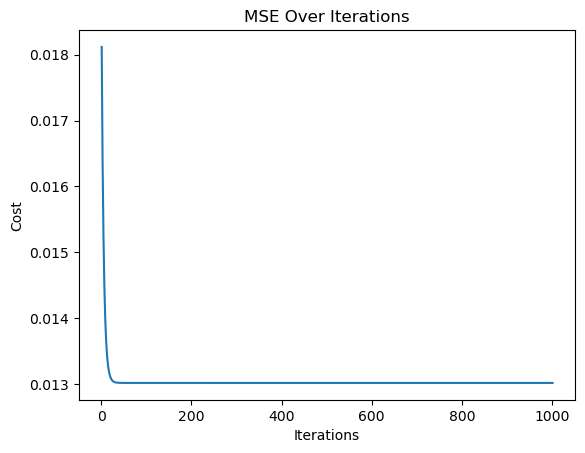

In [35]:
plot_iterations_mse(mse_history,1)

# regression line

y = b0 + b1x

In [56]:
print("Linear regression line based on iterative solution: ")
print( 'y ='+str(b0) + ' + ' + str(b1) + ' * x' )

Linear regression line based on iterative solution: 
y =0.2189026247902672 + 0.13114067266483764 * x


In [38]:
regression_line = b1 * normalized_train_data + b0

# plot regression

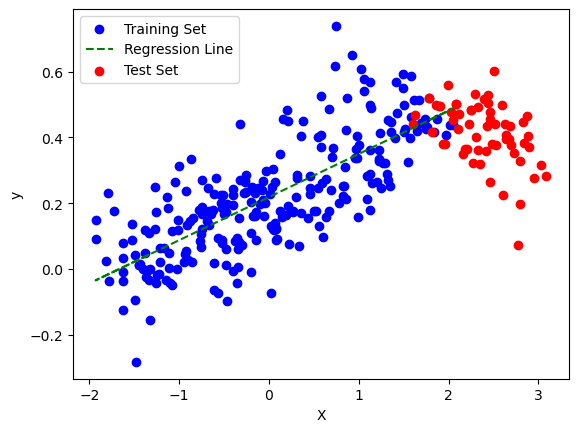

In [39]:
plt.scatter(normalized_train_data, y_train, color='blue', label='Training Set')
plt.plot(normalized_train_data, regression_line, color='green', linestyle='--', label='Regression Line')
plt.scatter(normalized_test_data, y_test, color='red', label='Test Set')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# results

Speed of Convergence: Lower learning rates generally require more iterations to converge to the minimum, while higher learning rates can converge more quickly. However, a very high learning rate might overshoot the minimum, causing the algorithm to diverge.

Stability and Accuracy: A lower learning rate may provide more stable and accurate results, albeit at the cost of computational time. On the other hand, a higher learning rate might be less stable, with the risk of overshooting the optimal solution.

Optimal Learning Rate: The experiment helps in identifying an optimal learning rate that balances the speed of convergence and the accuracy of the solution.

MSE Trends: By observing the mse_history, one can visualize how quickly the algorithm converges for each learning rate. An MSE that drops quickly and then stabilizes is generally a good sign. If the MSE oscillates or increases, the learning rate might be too high.

Parameter Sensitivity: The final values of b0 and b1 may vary depending on the learning rate and the number of iterations. The variability can indicate the sensitivity of your model to these hyperparameters.

Computational Cost: Higher number of iterations will naturally result in longer computational times, especially for lower learning rates.

Early Stopping Criteria: The experiment might show that beyond a certain number of iterations, the improvement in MSE is negligible, which can be used to set an early stopping criteria in a more advanced implementation.

Comparative Analysis: Storing the results of each learning rate (result list) and each MSE history (mse_history list) allows for a comparative analysis to choose the most effective learning rate and number of iterations for this specific problem.

In [33]:
headers = ["b0", "b1", "learning rate","iteration","mse"]
print(tabulate(result, headers, tablefmt="grid", numalign="right", stralign="right"))

+----------+----------+-----------------+-------------+-----------+
|       b0 |       b1 |   learning rate |   iteration |       mse |
+==========+==========+=================+=============+===========+
| 0.218903 | 0.131141 |             0.1 |        1000 | 0.0130176 |
+----------+----------+-----------------+-------------+-----------+
| 0.218903 | 0.131141 |             0.2 |         500 | 0.0130176 |
+----------+----------+-----------------+-------------+-----------+
| 0.218903 | 0.131141 |             0.3 |         333 | 0.0130176 |
+----------+----------+-----------------+-------------+-----------+
| 0.218903 | 0.131141 |             0.4 |         250 | 0.0130176 |
+----------+----------+-----------------+-------------+-----------+
| 0.218903 | 0.131141 |             0.5 |         200 | 0.0130176 |
+----------+----------+-----------------+-------------+-----------+
| 0.218903 | 0.131141 |             0.6 |         166 | 0.0130176 |
+----------+----------+-----------------+-------

# Iterative MSE test

In [52]:
y_test_pred = b0 + b1 * np.array(normalized_test_data)
test_mse_closed_form = np.mean((y_test - y_test_pred) ** 2)
print(f"Test MSE (Iterative): {test_mse_closed_form}")

Test MSE (Iterative): 0.02859462453702601


# Closed-form solution

$$  \beta = (X^T X)^{-1} X^T y  $$

1. **Linear Regression Model**: 
$$ y = X\beta  $$

2. **Define the Cost Function**: 
$$ J(\beta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\beta(x^{(i)}) - y^{(i)})^2 $$

3. **Vectorized Form**: 
$$ J(\beta) = \frac{1}{2m} (X\beta - y)^T (X\beta - y) $$

5. **Derivative and Setting to Zero**: 
$$ \frac{\partial J}{\partial \beta} = 0 $$

6. **Matrix Differentiation**: 
$$ \frac{\partial J}{\partial \beta} = \frac{1}{m} X^T (X\beta - y) $$

7. **Solving for $$\beta $$**: 
$$ \frac{1}{m} X^T (X\beta - y) = 0 $$

$$ X^T (X\beta - y) = 0 $$

8. **Isolate $$ X^T (X\beta - y) $$**: 
$$ X^T (X\beta - y) = 0 $$

9. **Multiply by $$ (X^T X)^{-1} $$**:
$$ (X^T X)^{-1} X^T (X\beta - y) = (X^T X)^{-1} \cdot 0 $$ 
$$ (X^T X)^{-1} X^T (X\beta - y) = 0 $$

10. **Simplify the Equation**: 
$$ (X^T X)^{-1} X^T X\beta - (X^T X)^{-1} X^T y = 0 $$

11. **Cancel Terms**: 
$$ I\beta - (X^T X)^{-1} X^T y = 0 $$

12. **Isolate $$ \beta $$**: 
$$ I\beta = (X^T X)^{-1} X^T y $$

13. **Final Solution**: 
$$ \beta = (X^T X)^{-1} X^T y $$

Step 1: Prepare Your Data

Step 2: Add a Bias Term to 

Step 3: Calculate the Optimal Parameters

Step 4: Use θ for Predictions

In [41]:
def closed_form_solution(X, y):
    X_b = np.c_[np.ones((len(X), 1)), X]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

In [42]:
theta_best = closed_form_solution(normalized_train_data, y_train)

# prediction

In [43]:
b0_closed_form = theta_best[0]
b1_closed_form = theta_best[1]

In [44]:
b0_closed_form,b1_closed_form

(0.21890262479026723, 0.13114067266483773)

In [55]:
print("Linear regression line based on closed-form solution: ")
print( 'y ='+str(b0_closed_form) + ' + ' + str(b1_closed_form) + ' * x')

Linear regression line based on closed-form solution: 
y =0.21890262479026723 + 0.13114067266483773 * x


In [49]:
closed_regression_line =  b0_closed_form + b1_closed_form * normalized_train_data

# MSE

In [51]:
y_test_pred = b0_closed_form + b1_closed_form * np.array(normalized_test_data)
test_mse_closed_form = np.mean((y_test - y_test_pred) ** 2)
print(f"Test MSE (Closed-Form): {test_mse_closed_form}")

Test MSE (Closed-Form): 0.02859462453702607


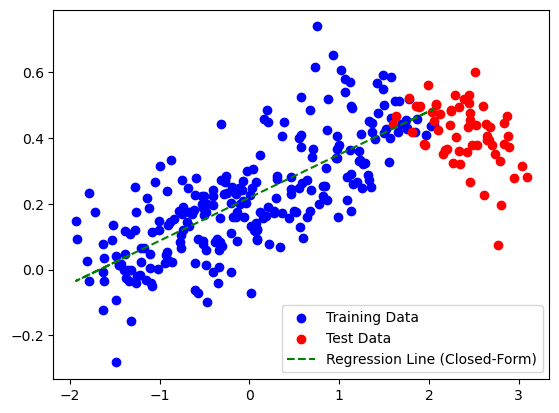

In [53]:
plt.scatter(normalized_train_data, y_train, color='blue', label='Training Data')
plt.scatter(normalized_test_data, y_test, color='red', label='Test Data')
plt.plot(normalized_train_data,closed_regression_line, color='green', linestyle='--', label='Regression Line (Closed-Form)')
plt.legend()
plt.show()